In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
game = pd.read_csv('ign.csv')
print(game)

FileNotFoundError: ignored

In [ ]:
import seaborn as sns
game.isnull().sum()

In [ ]:
cols = game.columns[:11]
colours = ['#000099', '#ffff00']
sns.heatmap(game[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
duplicates = game.duplicated()
num_duplicates = duplicates.sum()

print(f'Количество дубликатов: {num_duplicates}')

##Графики


In [ ]:
plt.hist(game['score'], bins=30, color='blue', alpha=0.7)
plt.title('Гистограмма данных')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

In [ ]:
plt.figure(figsize=[20,5])
sns.barplot(x=game.release_year, y=game.score)


Text(0.5, 0, 'Оценки игроков')

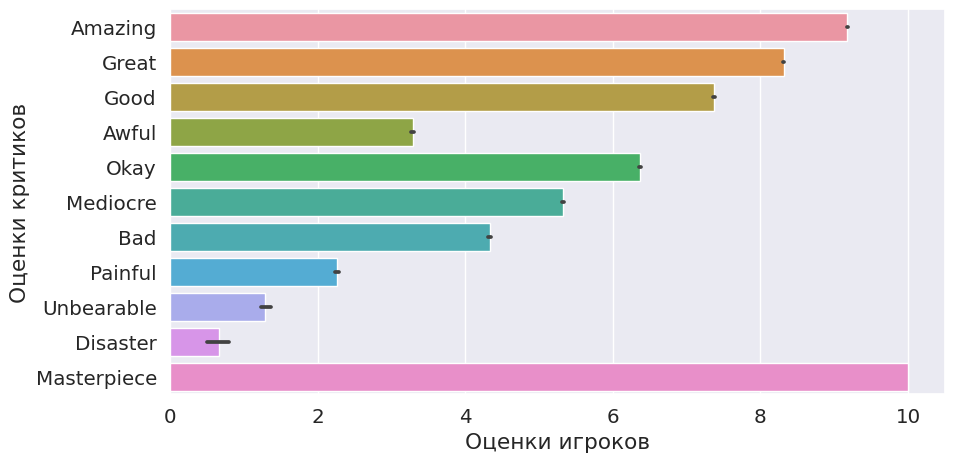

In [ ]:
plt.figure(figsize=[10,5])
sns.barplot(x=game.score, y=game.score_phrase)
plt.ylabel('Оценки критиков')
plt.xlabel('Оценки игроков')


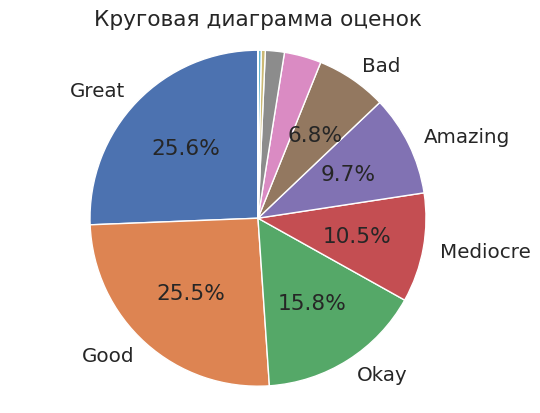

In [ ]:
value_counts = game['score_phrase'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Круговая диаграмма оценок')
plt.show()

##Разведочный анализ данных

Выявление трендов

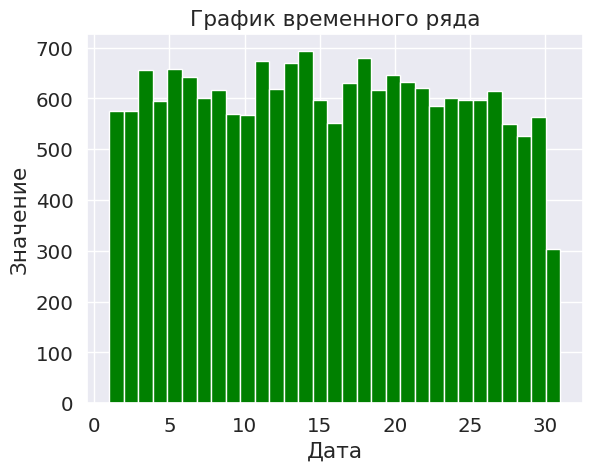

In [ ]:
plt.hist(game['release_day'], bins=31, color='green')
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()

Сезонность

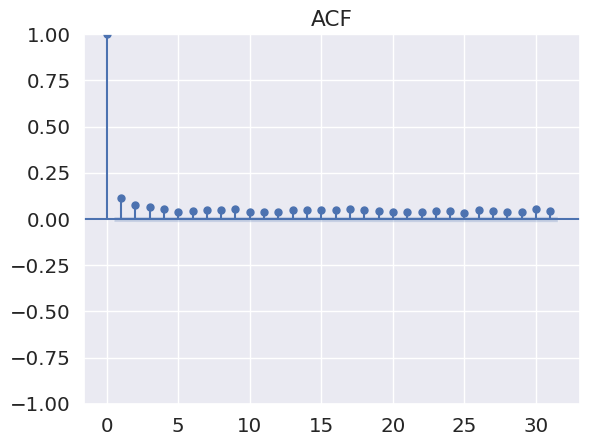

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Построение ACF
plot_acf(game['score'], lags=31)
plt.title('ACF')
plt.show()

Статистические характеристики

In [ ]:
print('Q25=',np.percentile(game['score'], 25))
print('Q75=', np.percentile(game['score'], 75))
print()

print('Среднее=',np.mean(game['score']))
print('Дисперсия=',np.var(game['score']))
print()
# Вычисление выборочных моментов
print('Момент 2=',np.mean((game['score'] - mean) ** 2))
print('Момент 3=',np.mean((game['score'] - mean) ** 3))
print('Момент 4=',np.mean((game['score'] - mean) ** 4))

Q25= 6.0
Q75= 8.2

Среднее= 6.950459060402685
Дисперсия= 2.9298823395991174

Момент 2= 2.9298823395991174
Момент 3= -4.277675978996649
Момент 4= 28.311489547736475


##Анализ и удаление выбросов

Text(0.5, 1.0, 'Анализ выбросов в оценках')

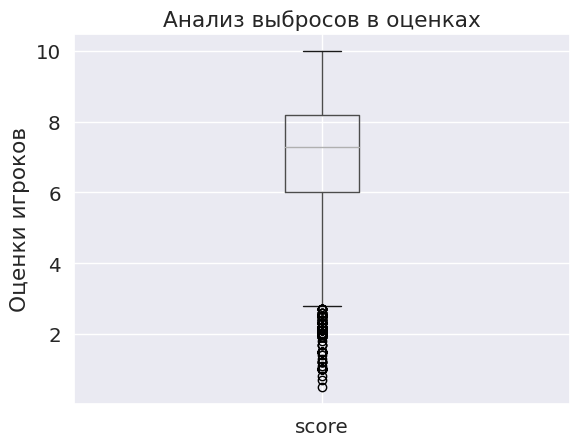

In [ ]:
game.boxplot(column=['score'])
plt.ylabel('Оценки игроков')
plt.title('Анализ выбросов в оценках')

Text(0.5, 1.0, 'Анализ выбросов в оценках')

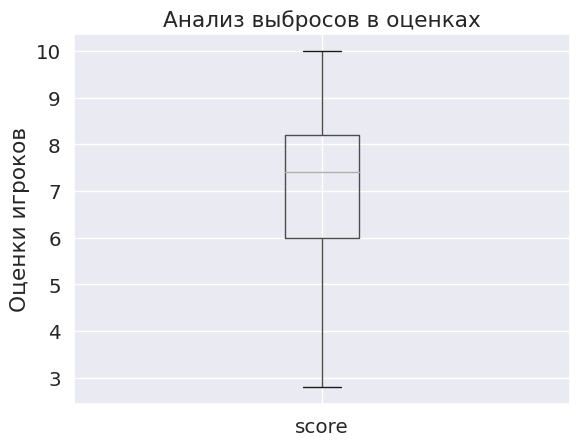

In [ ]:
Q1 = game['score'].quantile(0.25)
Q3 = game['score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(game['score']>=upper)[0]
lower_array = np.where(game['score']<=lower)[0]

game.drop(index=upper_array, inplace=True)
game.drop(index=lower_array, inplace=True)

game.boxplot(column=['score'])
plt.ylabel('Оценки игроков')
plt.title('Анализ выбросов в оценках')

##Бинаризация

In [ ]:
game.drop(['url', 'Unnamed: 0', 'title','platform','genre'], axis= 1 , inplace= True )
patterns = {
    "N": 0,
    "Y": 1,
    'Amazing':8,
    'Awful':2,
    'Bad':3,
    'Disaster':0,
    'Good':6,
    'Great':7,
    "Masterpiece":9,
    "Mediocre":4,
    "Okay":5,
    "Painful":1,
    "Unbearable":0
}
game = game.replace(patterns)
game

      score_phrase  score editors_choice  release_year  release_month  \
0          Amazing    9.0              Y          2012              9   
1          Amazing    9.0              Y          2012              9   
2            Great    8.5              N          2012              9   
3            Great    8.5              N          2012              9   
4            Great    8.5              N          2012              9   
...            ...    ...            ...           ...            ...   
18620         Good    7.6              N          2016              6   
18621      Amazing    9.0              Y          2016              6   
18622     Mediocre    5.8              N          2016              6   
18623  Masterpiece   10.0              Y          2016              6   
18624  Masterpiece   10.0              Y          2016              6   

       release_day  
0               12  
1               12  
2               12  
3               11  
4               11

,score_phrase,score,editors_choice,release_year,release_month,release_day
0,8,9.0,1,2012,9,12
1,8,9.0,1,2012,9,12
2,7,8.5,0,2012,9,12
3,7,8.5,0,2012,9,11
4,7,8.5,0,2012,9,11
...,...,...,...,...,...,...
18620,6,7.6,0,2016,6,29
18621,8,9.0,1,2016,6,29
18622,4,5.8,0,2016,6,28
18623,9,10.0,1,2016,6,28
